In [57]:
import os
import random
import shutil
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping

In [11]:
# Definir les rutes per les carpetes originals i la nova carpeta reduïda
original_folder = '/Users/esthersanroma/IT_ACADEMY/places'
new_folder = '/Users/esthersanroma/IT_ACADEMY/places_reduced'

REDUIM DATASET

In [5]:
# Definir les rutes per les carpetes originals i la nova carpeta reduïda
original_folder = '/Users/esthersanroma/IT_ACADEMY/places'
new_folder = '/Users/esthersanroma/IT_ACADEMY/places_reduced'

# Seleccionar aleatòriament la meitat dels fitxers
all_files = []
for foldername, subfolders, filenames in os.walk(original_folder):
    for filename in filenames:
        if filename.endswith('.jpg'):
            all_files.append(os.path.join(foldername, filename))
            
random.shuffle(all_files)
half_size = int(len(all_files)/2)
selected_files = all_files[:half_size]

# Copiar els fitxers seleccionats a la nova carpeta
if not os.path.exists(new_folder):
    os.makedirs(new_folder)

for file in selected_files:
    dst_dir = os.path.join(new_folder, os.path.dirname(os.path.relpath(file, original_folder)))
    dst_path = os.path.join(dst_dir, os.path.basename(file))
    os.makedirs(dst_dir, exist_ok=True)
    shutil.copy(file, dst_path)



In [12]:
# Comptar el nombre total d'imatges en el dataset original
num_images = 0
for foldername, subfolders, filenames in os.walk(new_folder):
    for filename in filenames:
        if filename.endswith('.jpg'):
            num_images += 1

print(f"El dataset reduit conté un total de {num_images} imatges.")

# Comptar quantes imatges hi ha per categoria
categories = {}
for foldername, subfolders, filenames in os.walk(new_folder):
    for filename in filenames:
        if filename.endswith('.jpg'):
            category = os.path.basename(os.path.dirname(foldername))
            if category not in categories:
                categories[category] = 1
            else:
                categories[category] += 1

print("Nombre d'imatges per categoria:")
for category, num_images in categories.items():
    print(f"{category}: {num_images}")

El dataset reduit conté un total de 123634 imatges.
Nombre d'imatges per categoria:
r: 8680
underwater: 771
i: 1726
inn: 466
ice_skating_rink: 312
n: 379
g: 2814
t: 3214
track: 582
train_station: 757
temple: 841
s: 9745
subway_station: 316
stadium: 1486
swimming_pool: 356
stage: 284
a: 8838
apartment_building: 287
f: 5556
field: 1223
o: 3037
h: 5617
hotel: 326
m: 5960
museum: 377
market: 501
monastery: 297
j: 377
c: 15452
cathedral: 378
church: 398
d: 3303
dinette: 385
desert: 1020
doorway: 341
v: 3717
e: 1007
b: 13257
bakery: 666
k: 2113
l: 2906
y: 780
p: 8987
w: 3799


In [8]:
# crear llista de categories i guardarla a /Users/esthersanroma/IT_ACADEMY/category_list.txt

In [13]:
# Definir les rutes per la carpeta reduïda i l'arxiu de sortida del llistat de categories
new_folder = '/Users/esthersanroma/IT_ACADEMY/places_reduced'
category_list_file = '/Users/esthersanroma/IT_ACADEMY/category_list.txt'

# Crear una llista de tuples (ruta del fitxer, categoria) per a cada fitxer d'imatge a la carpeta reduïda
file_category_list = []
for category in os.listdir(new_folder):
   if not category.startswith('.'):
       category_folder = os.path.join(new_folder, category)
       for subfolder in os.listdir(category_folder):
           if not subfolder.startswith('.'):
               subfolder_folder = os.path.join(category_folder, subfolder)
               for file in os.listdir(subfolder_folder):
                   if file.endswith('.jpg'):
                       file_path = os.path.join(subfolder_folder, file)
                       file_category_list.append((file_path, os.path.join(category, subfolder)))


# Guardar la llista de categories en un arxiu de text
with open(category_list_file, 'w') as f:
   f.write('\n'.join(sorted(set([category for _, category in file_category_list]))))

# Dividir aleatòriament els fitxers en dos conjunts: un per a l'entrenament i un altre per a la validació
random.shuffle(file_category_list)
train_size = int(0.8 * len(file_category_list))
train_list = file_category_list[:train_size]
val_list = file_category_list[train_size:]




In [14]:
categories = set()
for foldername, subfolders, filenames in os.walk(new_folder):
   for subfolder in subfolders:
       categories.add(subfolder)

# Imprimir les categories
print(f"Les categories són: {list(categories)}")



Les categories són: ['pavilion', 'mansion', 'vegetation', 'game_room', 'fire_station', 'pantry', 'sea_cliff', 'hot_spring', 'corn_field', 'shop', 'badlands', 'music_studio', 'p', 'snowfield', 'shoe_shop', 'v', 'herb_garden', 'dinette', 'creek', 'c', 'i', 'outdoor', 'classroom', 'dam', 'excavation', 'river', 'construction_site', 'bayou', 'hotel_room', 'veranda', 'kitchenette', 'yard', 'pagoda', 'playground', 'food_court', 'ice_skating_rink', 'desert', 'fountain', 'e', 'raft', 't', 'parking_lot', 'corridor', 'shower', 'pulpit', 'igloo', 'slum', 'ruin', 'church', 'hotel', 'arch', 'valley', 'fire_escape', 'assembly_line', 'field', 'supermarket', 'dining_room', 'butte', 'courthouse', 'racecourse', 'office_building', 'art_gallery', 'campsite', 'cafeteria', 'g', 'football', 'building_facade', 'coral_reef', 'residential_neighborhood', 'stadium', 'subway_station', 'reception', 'hospital_room', 'crevasse', 'garbage_dump', 'doorway', 'parlor', 'canyon', 'conference_center', 'palace', 'ice_cream_p

(256, 256, 3)
uint8
(256, 256, 3)
uint8
(256, 256, 3)
uint8


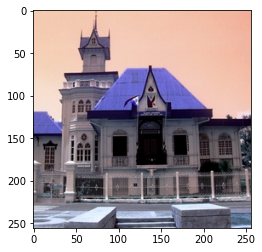

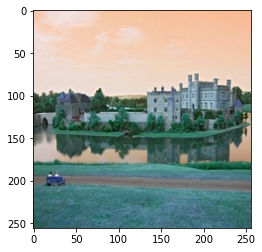

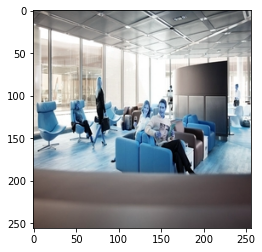

In [15]:
# Llegim la imatge amb OpenCV
image = cv2.imread('/Users/esthersanroma/IT_ACADEMY/places_reduced/m/mansion/gsun_e01b6b5aabee4f8edf4490705045516d.jpg')
image2=cv2.imread("/Users/esthersanroma/IT_ACADEMY/places_reduced/p/palace/gsun_9c5875ad4403a98a4c33ae8464bc724e.jpg")
image3=cv2.imread("/Users/esthersanroma/IT_ACADEMY/places_reduced/a/airport_terminal/gsun_f6a7bc92c9567696b32c9304a323574e.jpg")
# Mostrem la forma de la matriu (dimensions) i la seva tipologia
print(image.shape)
print(image.dtype)
print(image2.shape)
print(image2.dtype)
print(image3.shape)
print(image3.dtype)



# Visualitzem la imatge amb Matplotlib
plt.imshow(image)
plt.show()
plt.imshow(image2)
plt.show()
plt.imshow(image3)
plt.show()

Les imatges tenen dimensions (256, 256, 3), el que significa que ttenen 256 píxels d'alçada, 256 píxels d'amplada i 3 canals de color (RGB). També veiem que els valors dels píxels són de tipus uint8, que significa que són enters sense signe de 8 bits (0 a 255).

DIVIDIM DATASET TRAIN/TEST/VALIDACIÓ

In [17]:
def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)
            
            
dataset_path = '/Users/esthersanroma/IT_ACADEMY/places_reduced'
train_path = '/Users/esthersanroma/IT_ACADEMY/directory/train'
test_path = '/Users/esthersanroma/IT_ACADEMY/directory/test'
val_path = '/Users/esthersanroma/IT_ACADEMY/directory/validation'

# Crear les carpetes de train, test i validació
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

# Definir la proporció dels conjunts de train, test i validació
train_ratio = 0.7
test_ratio = 0.2
val_ratio = 0.1



# Recórrer les carpetes de lletres i copiar les imatges a les carpetes corresponents
for letter_folder in os.listdir(dataset_path):
    if letter_folder.startswith('.'):
        continue
    letter_path = os.path.join(dataset_path, letter_folder)
    if not os.path.isdir(letter_path):  # Comprovar si és una carpeta
        continue
    for subfolder, subdirs, files in os.walk(letter_path):
        # Copiar la carpeta original a la carpeta de train, test o validation
        if subfolder == letter_path:
            train_subfolder = os.path.join(train_path, letter_folder)
            test_subfolder = os.path.join(test_path, letter_folder)
            val_subfolder = os.path.join(val_path, letter_folder)
            #shutil.copytree(subfolder, os.path.join(train_subfolder, os.path.basename(subfolder)))
            #shutil.copytree(subfolder, os.path.join(test_subfolder, os.path.basename(subfolder)))
            #shutil.copytree(subfolder, os.path.join(val_subfolder, os.path.basename(subfolder)))
            
     # Copiar només la part proporcional de les imatges a cada carpeta
        else:
            num_train = int(train_ratio * len(files))
            num_test = int(test_ratio * len(files))
            num_val = len(files) - num_train - num_test
            for i, image_file in enumerate(files):
                if i < num_train:
                    dst_folder = os.path.join(train_path, letter_folder, os.path.relpath(subfolder, letter_path))
                elif i < num_train + num_test:
                    dst_folder = os.path.join(test_path, letter_folder, os.path.relpath(subfolder, letter_path))
                else:
                    dst_folder = os.path.join(val_path, letter_folder, os.path.relpath(subfolder, letter_path))
                src_path = os.path.join(subfolder, image_file)
                if not os.path.isfile(src_path):  # Comprovar si és un fitxer
                    continue
                os.makedirs(dst_folder, exist_ok=True)
                shutil.copy2(src_path, dst_folder)




In [17]:
dataset_path = '/Users/esthersanroma/IT_ACADEMY/places_reduced'
train_path = '/Users/esthersanroma/IT_ACADEMY/directory/train'
test_path = '/Users/esthersanroma/IT_ACADEMY/directory/test'
val_path = '/Users/esthersanroma/IT_ACADEMY/directory/validation'



In [ ]:
#Preprecessat_Places.py

VISUALITZACIÓ TRAIN, TEST I VALIDACIÓ

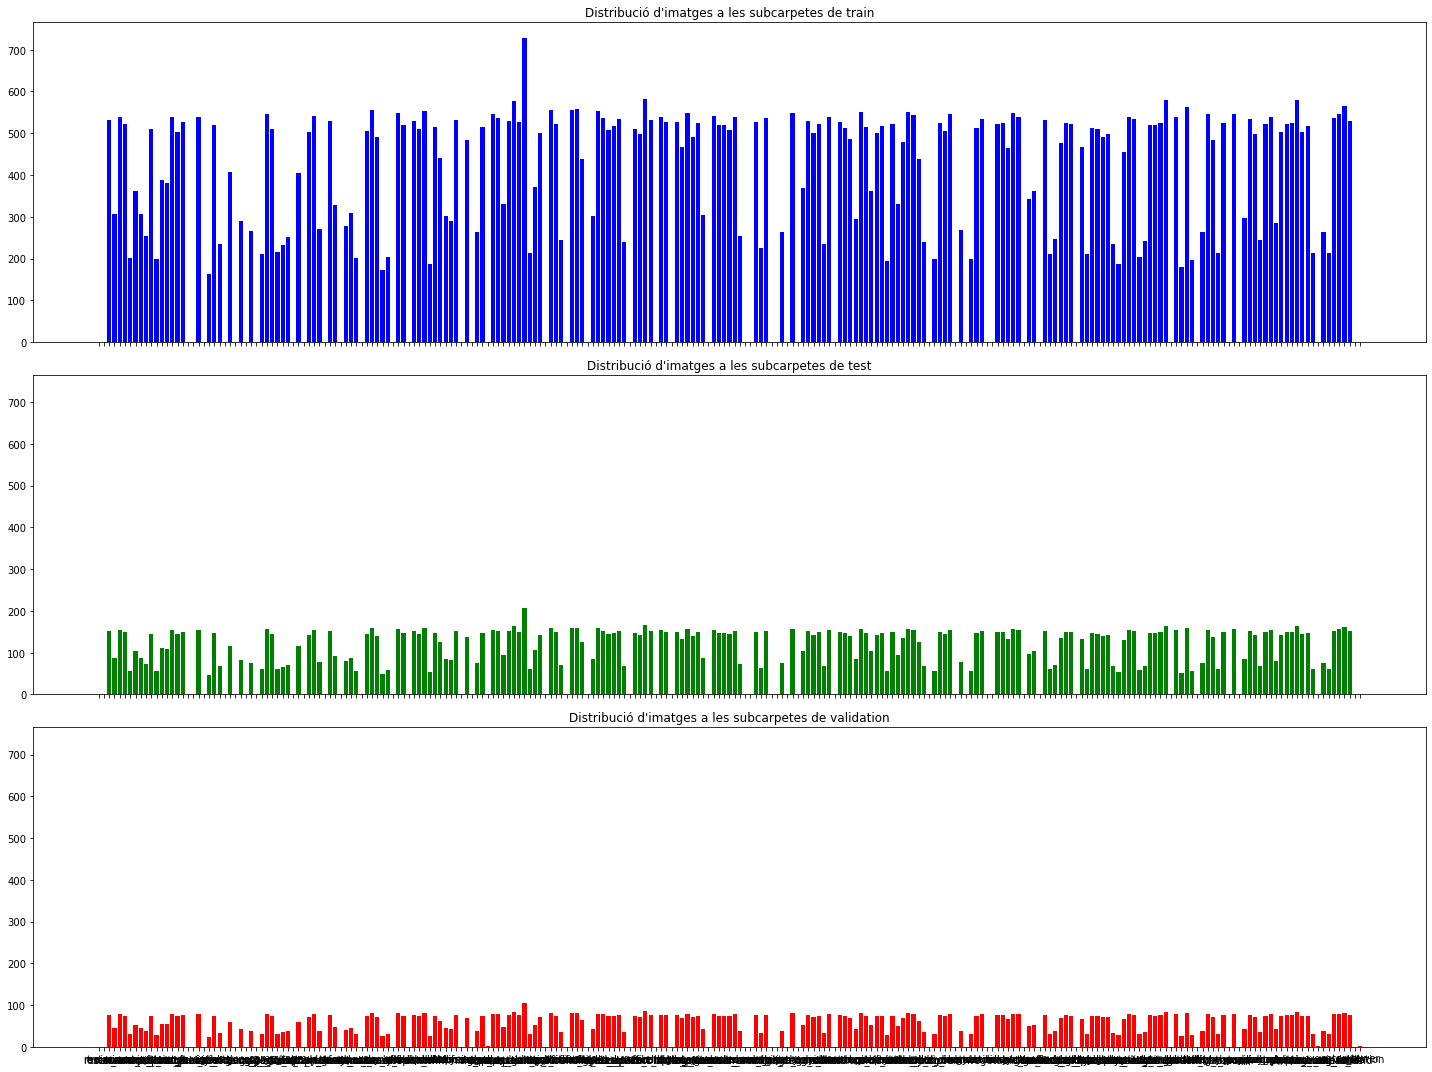

In [18]:
num_images_train = []
folders_train = []

for root, dirs, files in os.walk(train_path):
    folders_train.append(os.path.basename(root))
    num_images_train.append(len(files))

num_images_test = []
folders_test = []

for root, dirs, files in os.walk(test_path):
    folders_test.append(os.path.basename(root))
    num_images_test.append(len(files))

num_images_val = []
folders_val = []

for root, dirs, files in os.walk(val_path):
    folders_val.append(os.path.basename(root))
    num_images_val.append(len(files))

fig, axs = plt.subplots(3, 1, figsize=(20, 15), sharex=True, sharey=True)

axs[0].bar(folders_train, num_images_train, color='blue')
axs[0].set_title('Distribució d\'imatges a les subcarpetes de train')
axs[1].bar(folders_test, num_images_test, color='green')
axs[1].set_title('Distribució d\'imatges a les subcarpetes de test')
axs[2].bar(folders_val, num_images_val, color='red')
axs[2].set_title('Distribució d\'imatges a les subcarpetes de validation')


plt.tight_layout()
plt.show()

INFORMACIÓ DE TRAIN, TEST i VALIDACIÓ

In [23]:
def count_images(path):
    count = 0
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.jpg'):
                count += 1
    return count

places_count = count_images(dataset_path)
train_count = count_images(train_path)
test_count = count_images(test_path)
val_count = count_images(val_path)

print("Nombre d'imatges a la carpeta place_reduced:", places_count)
print("Nombre d'imatges a la carpeta train:", train_count)
print("Nombre d'imatges a la carpeta test:", test_count)
print("Nombre d'imatges a la carpeta validation:", val_count)
print("Nombre d'imatges a la carpeta train, test i validation:", val_count + train_count + test_count)

def get_labels(path):
    labels = set()
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.jpg'):
                label = os.path.basename(root)
                labels.add(label)
    return list(labels)

labels = get_labels(dataset_path)
print("________________________")

print("Etiquetes:", labels)
print("Nombre d'etiquetes:", len(labels))


Nombre d'imatges a la carpeta place_reduced: 123634
Nombre d'imatges a la carpeta train: 86448
Nombre d'imatges a la carpeta test: 24644
Nombre d'imatges a la carpeta validation: 12542
Nombre d'imatges a la carpeta train, test i validation: 123634
________________________
Etiquetes: ['formal_garden', 'beauty_salon', 'ocean', 'rope_bridge', 'boxing_ring', 'hospital', 'river', 'indoor', 'golf_course', 'mausoleum', 'viaduct', 'south_asia', 'gas_station', 'dining_room', 'banquet_hall', 'creek', 'cultivated', 'cemetery', 'vegetation', 'shop', 'bridge', 'jail_cell', 'picnic_area', 'assembly_line', 'motel', 'shoe_shop', 'staircase', 'aquarium', 'cafeteria', 'platform', 'castle', 'botanical_garden', 'wind_farm', 'bowling_alley', 'shower', 'pavilion', 'office_building', 'medina', 'corridor', 'galley', 'campsite', 'laundromat', 'fire_escape', 'pagoda', 'snowfield', 'plaza', 'fountain', 'aqueduct', 'wheat_field', 'badlands', 'kasbah', 'east_asia', 'baseball_field', 'amusement_park', 'kitchen', 's

In [31]:
# Colors RGB
R = '\033[31m'  # Vermell
G = '\033[32m'  # Verd
B = '\033[34m'  # Blau
C = '\033[36m'  # Cian
M = '\033[35m'  # Magenta
Y = '\033[33m'  # Groc
RESET = '\033[0m'  # Reset dels colors

data_dir ='/Users/esthersanroma/IT_ACADEMY/places_reduced'

# Iterem a través de totes les carpetes
for label in os.listdir(data_dir):
    if label != '.DS_Store':
        label_dir = os.path.join(data_dir, label)
        print(f"Classe:{R}{label}{RESET} ({G}{len(os.listdir(label_dir))}{RESET} etiquetes):")
        for file in os.listdir(label_dir):
            print(f"    {B}{file}{RESET}")        
        

Classe:r (15 etiquetes):
    restaurant
    rock_arch
    river
    runway
    restaurant_kitchen
    restaurant_patio
    racecourse
    reception
    rainforest
    rope_bridge
    ruin
    residential_neighborhood
    railroad_track
    raft
    rice_paddy
Classe:u (1 etiquetes):
    underwater
Classe:i (6 etiquetes):
    igloo
    iceberg
    islet
    inn
    ice_skating_rink
    ice_cream_parlor
Classe:n (1 etiquetes):
    nursery
Classe:g (6 etiquetes):
    garbage_dump
    golf_course
    gas_station
    game_room
    galley
    gift_shop
Classe:t (9 etiquetes):
    tree_farm
    track
    tower
    train_railway
    topiary_garden
    train_station
    trench
    temple
    television_studio
Classe:s (20 etiquetes):
    supermarket
    sky
    ski_resort
    shoe_shop
    snowfield
    subway_station
    shed
    swamp
    stadium
    sea_cliff
    sandbar
    shower
    slum
    schoolhouse
    shopfront
    staircase
    swimming_pool
    skyscraper
    stage
    ski_slope
C

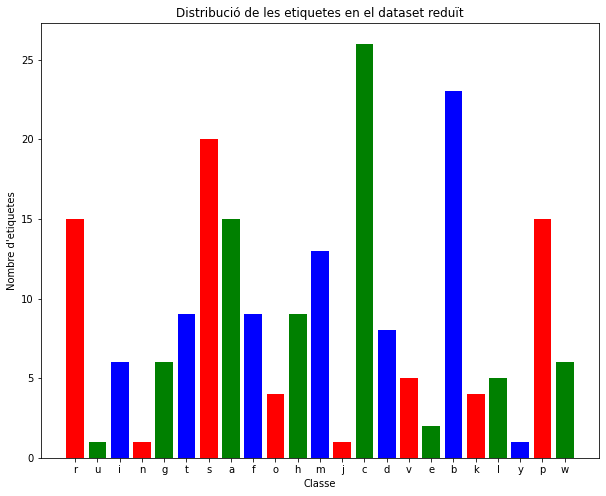

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(labels, num_images, color=['r', 'g', 'b'])
ax.set_xlabel('Classe')
ax.set_ylabel('Nombre d\'etiquetes')
ax.set_title('Distribució de les etiquetes en el dataset reduït')
plt.show()


In [33]:
data_train ='/Users/esthersanroma/IT_ACADEMY/train'

# Iterem a través de totes les carpetes
for label in os.listdir(data_train):
    if label != '.DS_Store':
        label_dir = os.path.join(data_dir, label)
        print(f"Classe:{R}{label}{RESET} ({G}{len(os.listdir(label_dir))}{RESET} etiquetes):")
        for file in os.listdir(label_dir):
            print(f"    {B}{file}{RESET}")        
        

Classe:r (15 etiquetes):
    restaurant
    rock_arch
    river
    runway
    restaurant_kitchen
    restaurant_patio
    racecourse
    reception
    rainforest
    rope_bridge
    ruin
    residential_neighborhood
    railroad_track
    raft
    rice_paddy
Classe:u (1 etiquetes):
    underwater
Classe:i (6 etiquetes):
    igloo
    iceberg
    islet
    inn
    ice_skating_rink
    ice_cream_parlor
Classe:n (1 etiquetes):
    nursery
Classe:g (6 etiquetes):
    garbage_dump
    golf_course
    gas_station
    game_room
    galley
    gift_shop
Classe:t (9 etiquetes):
    tree_farm
    track
    tower
    train_railway
    topiary_garden
    train_station
    trench
    temple
    television_studio
Classe:s (20 etiquetes):
    supermarket
    sky
    ski_resort
    shoe_shop
    snowfield
    subway_station
    shed
    swamp
    stadium
    sea_cliff
    sandbar
    shower
    slum
    schoolhouse
    shopfront
    staircase
    swimming_pool
    skyscraper
    stage
    ski_slope
C

In [36]:
num_images_train = []
labels_train = []

for label in os.listdir(data_train):
    if label != '.DS_Store':
        label_dir = os.path.join(data_train, label)
        num_images_train.append(len(os.listdir(label_dir)))
        labels_train.append(label)

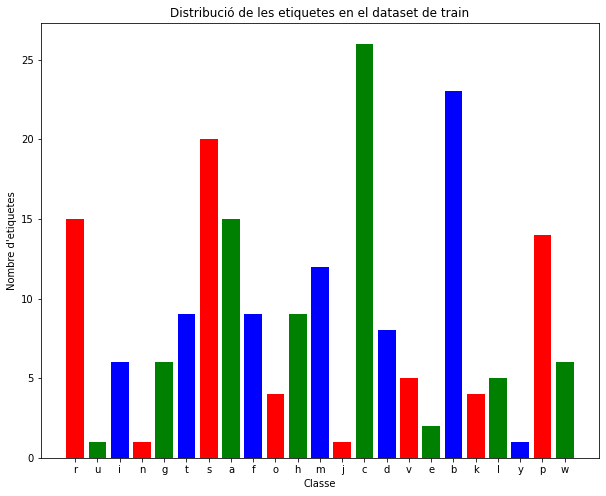

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(labels_train, num_images_train, color=['r', 'g', 'b'])
ax.set_xlabel('Classe')
ax.set_ylabel('Nombre d\'etiquetes')
ax.set_title('Distribució de les etiquetes en el dataset de train')
plt.show()

TRANSFORMACIÓ DE TRAIN(Equilibrar les imatges, es crearan noves imatges aumentant, girant....) i NORMALITZACIÓ DE TRAIN, TEST I VALIDACIÓ (rang (0,1))

In [20]:

train_path = '/Users/esthersanroma/IT_ACADEMY/directory/train'
test_path = '/Users/esthersanroma/IT_ACADEMY/directory/test'
val_path = '/Users/esthersanroma/IT_ACADEMY/directory/validation'

# Definim la transformació d'aument de dades
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Càrrega les imatges de train i aplica la transformació d'aument de dades
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

# Càrrega les imatges de test i validació i normalitza els píxels
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')



Found 86448 images belonging to 23 classes.
Found 24644 images belonging to 23 classes.
Found 12542 images belonging to 23 classes.


com probem que totes les imatges es llegeixen correctament

In [21]:
count = sum(os.path.getsize(os.path.join(root, filename)) == 0 for root, _, filenames in os.walk("/Users/esthersanroma/IT_ACADEMY/directory/train") for filename in filenames)
print(count)

0


In [22]:
train_path = '/Users/esthersanroma/IT_ACADEMY/directory/train'

for subdir, dirs, files in os.walk(train_path):
    for file in files:
        filepath = subdir + os.sep + file
        if filepath.endswith(".jpg") or filepath.endswith(".png"):
            img = cv2.imread(filepath)
            if img is None:
                print("Error loading image:", filepath)

VISUALITZACIÓ D'IMATGES DE TRAIN TRANSFORMADES

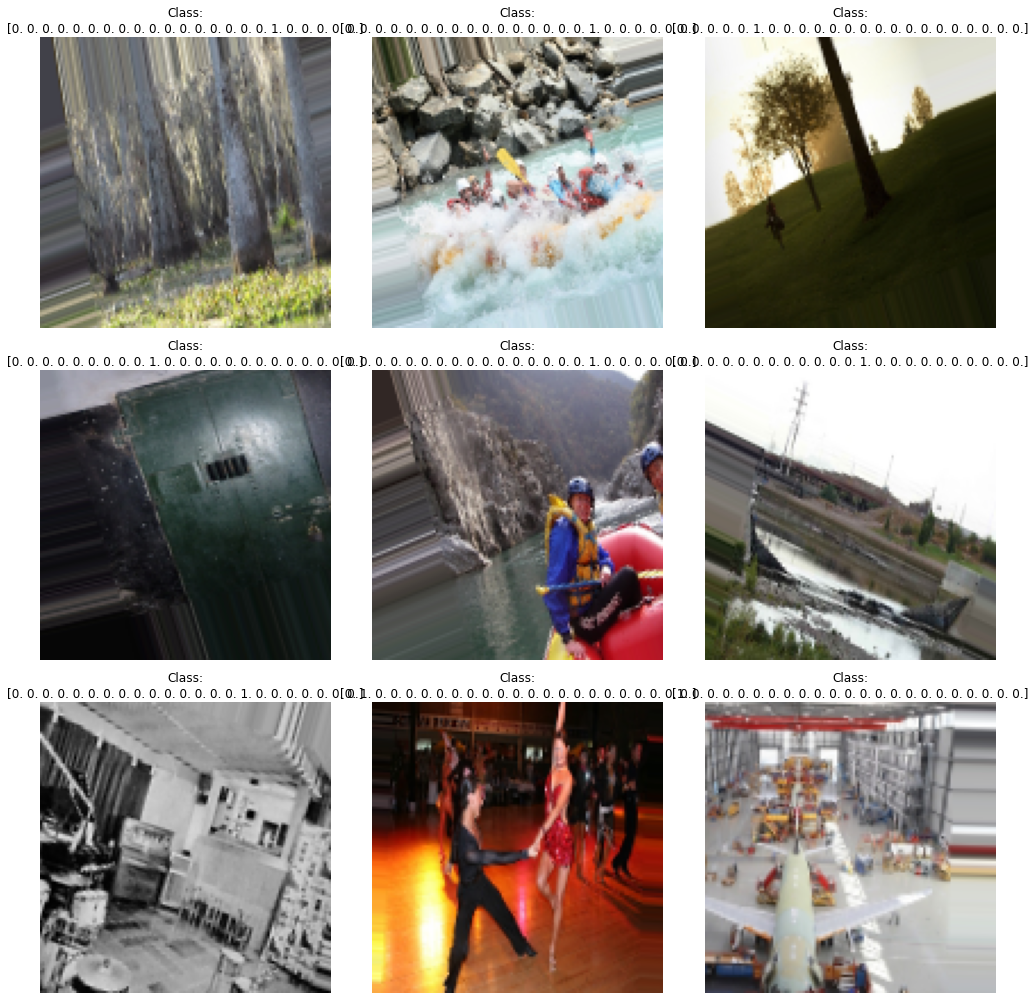

In [23]:
# obtenir un lot d'imatges augmentades
x_batch, y_batch = train_generator.next()

# visualitzar les imatges
fig, axs = plt.subplots(3, 3, figsize=(14, 14))
fig.subplots_adjust(hspace=0.8)
fig.tight_layout()

for i in range(3):
    for j in range(3):
        axs[i][j].imshow(x_batch[i*3+j])
        axs[i][j].axis('off')
        axs[i][j].set_title('Class:\n'+str(y_batch[i*3+j]))

plt.show()
        

 les imatges originals i les imatges normalitzades 

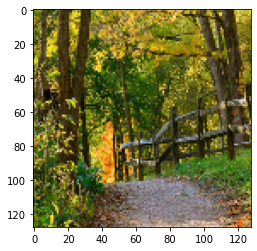

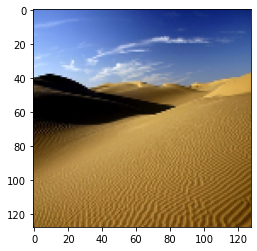

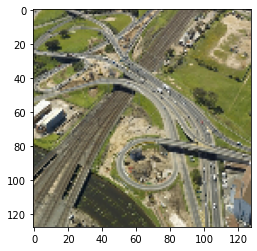

1.0
0.0
1.0
0.0
1.0
0.0


In [90]:
# Carrega una imatge de la carpeta de test
img_path = "/Users/esthersanroma/IT_ACADEMY/directory/test/f/forest_path/gsun_03b9968f0b6632a466fb641d47854148.jpg"
img= image.load_img(img_path, target_size=(128, 128))
img1_path = "/Users/esthersanroma/IT_ACADEMY/directory/train/d/desert/sand/gsun_0d81ccdc83101dc476a3a8547930fbf1.jpg"
img1= image.load_img(img1_path, target_size=(128, 128))
img2_path = "/Users/esthersanroma/IT_ACADEMY/directory/validation/h/highway/gsun_baa2bad4ed0b8bfa93a5105bf275a6cd.jpg"
img2 = image.load_img(img2_path, target_size=(128, 128))



# Normalitza la imatge
x = image.img_to_array(img) / 255.0

x1=image.img_to_array(img1) / 255.0

x2=image.img_to_array(img2) / 255.0

plt.imshow(x)
plt.show()
plt.imshow(x1)
plt.show()
plt.imshow(x2)
plt.show()

# verificar que els píxels estan al rang 0-1
print(np.max(x))  # hauria de ser 1.0
print(np.min(x))  # hauria de ser 0.0
# verificar que els píxels estan al rang 0-1
print(np.max(x1))  # hauria de ser 1.0
print(np.min(x1))  # hauria de ser 0.0# verificar que els píxels estan al rang 0-1
print(np.max(x2))  # hauria de ser 1.0
print(np.min(x2))  # hauria de ser 0.0

In [25]:
batch_X, batch_y = next(train_generator)
print(batch_X.shape)
batch_X, batch_y = next(test_generator)
print(batch_X.shape)
batch_X, batch_y = next(val_generator)
print(batch_X.shape)

(32, 128, 128, 3)
(32, 128, 128, 3)
(32, 128, 128, 3)


ARQUITECTURA DEL MODEL

In [211]:
model = Sequential()
# Primera capa de convolució
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

# Segona capa de convolució
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Tercera capa de convolució
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Quarta capa de convolució
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(23, activation='softmax'))
# Definim l'entrada del model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_108 (Conv2D)         (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_105 (MaxPooli  (None, 63, 63, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_109 (Conv2D)         (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_106 (MaxPooli  (None, 30, 30, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_110 (Conv2D)         (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_107 (MaxPooli  (None, 14, 14, 128)    

In [ ]:
En concret, el model té les següents capes:

Una capa de convolució amb 32 filtres i mida de kernel 3x3, amb una funció d'activació ReLU.
Una capa de max pooling amb una finestra de 2x2.
Una segona capa de convolució amb 64 filtres i mida de kernel 3x3, amb una funció d'activació ReLU.
Una segona capa de max pooling amb una finestra de 2x2.
Una tercera capa de convolució amb 128 filtres i mida de kernel 3x3, amb una funció d'activació ReLU.
Una tercera capa de max pooling amb una finestra de 2x2.
Una quarta capa de convolució amb 128 filtres i mida de kernel 3x3, amb una funció d'activació ReLU.
Una quarta capa de max pooling amb una finestra de 2x2.
Una capa flatten per convertir la sortida de la capa de max pooling en un vector.
Una capa totalment connectada amb 512 neurones, amb una funció d'activació ReLU.
Una capa de sortida amb 23 neurones i una funció d'activació softmax, que retorna les probabilitats de pertinença a cada classe.
El model té un total de 2.612.439 paràmetres, que són tots entrenables, és a dir, que poden ser ajustats durant el procés d'entrenament.

In [ ]:
DIVIDIM TRAIN (image_paths és la variable X que conté la ruta a cada imatge, i labels és la variable Y que conté les etiquetes de classe corresponents a cada imatge.)

In [212]:
X_train, y_train = train_generator.next()
X_val, y_val = val_generator.next()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=42)

In [213]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(25, 128, 128, 3)
(25, 23)
(7, 128, 128, 3)
(7, 23)


In [214]:
# definir model i preparar dades...

# configurar ModelCheckpoint per guardar els pesos en cada època
checkpoint_path = "weights.{epoch:02d}.hdf5"
checkpoint_callback = ModelCheckpoint(checkpoint_path, save_weights_only=True)

# entrenar model amb ModelCheckpoint com a callback
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[checkpoint_callback])


Epoch 1/10
1/1 [==============================] - 8s 8s/step - loss: 3.1898 - accuracy: 0.0000e+00 - val_loss: 3.2194 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 2.9416 - accuracy: 0.1600 - val_loss: 3.6705 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 1s 981ms/step - loss: 2.6815 - accuracy: 0.1600 - val_loss: 3.9550 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 2.5068 - accuracy: 0.1600 - val_loss: 4.0484 - val_accuracy: 0.1429
Epoch 5/10
1/1 [==============================] - 1s 991ms/step - loss: 2.3690 - accuracy: 0.4400 - val_loss: 4.4324 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 2.1226 - accuracy: 0.4000 - val_loss: 5.1388 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 1.8520 - accuracy: 0.4000 - val_loss: 6.1277 - val_accuracy: 0.0000e+00
Epoch 8

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 1.3166 - accuracy: 0.6000 - val_loss: 9.0891 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 0.8906 - accuracy: 0.8000 - val_loss: 10.6979 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 1.0365 - accuracy: 0.5200 - val_loss: 9.5681 - val_accuracy: 0.1429
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 1.0069 - accuracy: 0.6000 - val_loss: 9.3459 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 1s 950ms/step - loss: 0.7602 - accuracy: 0.8800 - val_loss: 9.3702 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 1s 896ms/step - loss: 0.9132 - accuracy: 0.7600 - val_loss: 8.1694 - val_accuracy: 0.1429
Epoch 7/10
1/1 [==============================] - 1s 868ms/step - loss: 0.5175 - accuracy: 0.8800 - val_loss: 7.8834 - val_accuracy: 0.1429
Epoch 8/10
1/1 

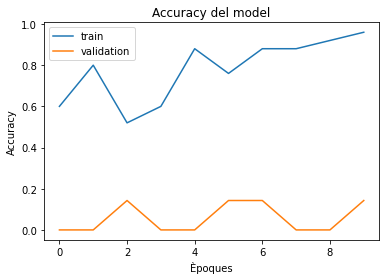

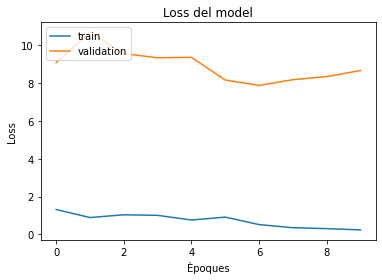

In [215]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)
# Visualitzar accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy del model')
plt.ylabel('Accuracy')
plt.xlabel('Èpoques')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Visualitzar loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss del model')
plt.ylabel('Loss')
plt.xlabel('Èpoques')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Podem observar que la precisió és molt baixa. En l'última època (epoch), la precisió és del 60% per a les dades d'entrenament i 0% per a les dades de validació. Això indica que el model està sobreajustant-se als dades d'entrenament i no està generalitzant bé.

In [220]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 2.9325e-06 - accuracy: 1.0000 - val_loss: 28.2048 - val_accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 1s 939ms/step - loss: 2.6274e-06 - accuracy: 1.0000 - val_loss: 28.3460 - val_accuracy: 0.0000e+00
Epoch 3/30
1/1 [==============================] - 1s 808ms/step - loss: 2.5225e-06 - accuracy: 1.0000 - val_loss: 28.4757 - val_accuracy: 0.0000e+00
Epoch 4/30
1/1 [==============================] - 1s 787ms/step - loss: 2.5463e-06 - accuracy: 1.0000 - val_loss: 28.5901 - val_accuracy: 0.0000e+00
Epoch 5/30
1/1 [==============================] - 1s 764ms/step - loss: 2.6369e-06 - accuracy: 1.0000 - val_loss: 28.6867 - val_accuracy: 0.0000e+00
Epoch 6/30
1/1 [==============================] - 1s 759ms/step - loss: 2.7084e-06 - accuracy: 1.0000 - val_loss: 28.7646 - val_accuracy: 0.0000e+00
Epoch 7/30
1/1 [==============================] - 1s 871ms/step - loss: 2.7370e-06 - accuracy: 1.0000 - val_l

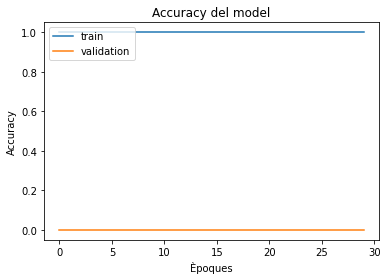

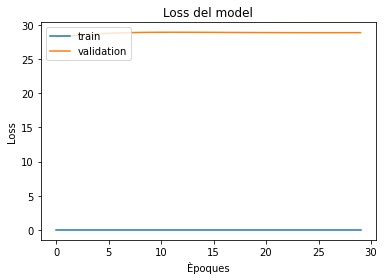

In [221]:

# Visualitzar accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy del model')
plt.ylabel('Accuracy')
plt.xlabel('Èpoques')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Visualitzar loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss del model')
plt.ylabel('Loss')
plt.xlabel('Èpoques')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Sembla que augmentar el nombre d'èpoques ha resultat en una precisió de entrenament molt alta (1.0) però una precisió de validació molt baixa (0.0), indicant que el model s'ha ajustat excessivament a les dades d'entrenament i no és capaç de generalitzar a dades noves. Això podria ser perquè el model és massa complex per a la mida del conjunt de dades o bé el mateix conjunt de dades no és prou divers per capturar la veritable variabilitat del problema.

opcions per prevenir l'overfitting, com ara:

Regularització: Afegeix penalitzacions als pesos del model durant l'entrenament per limitar la seva magnitud i prevenir l'overfitting. Pots provar amb la regularització L1 o L2, o bé amb la regularització de Dropout.
Reducció de la complexitat del model: Redueix la quantitat de capes i/o neurones del model per limitar la seva capacitat de memorització.
Ajustament del learning rate: Prova amb diferents valors de learning rate per ajustar la velocitat d'aprenentatge del model. Potser el valor que estàs utilitzant actualment és massa gran i està provocant l'overfitting.
Utilitzar més dades d'entrenament: Si és possible, aconsegueix més dades d'entrenament per millorar la generalització del model.

model2 REGULARITZACIÓ L2

In [222]:
from tensorflow.keras import regularizers

model2 = Sequential()
# Primera capa de convolució
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model2.add(MaxPooling2D((2, 2)))

# Segona capa de convolució
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))

# Tercera capa de convolució
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(MaxPooling2D((2, 2)))

# Quarta capa de convolució
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(23, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_112 (Conv2D)         (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_109 (MaxPooli  (None, 63, 63, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_113 (Conv2D)         (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_110 (MaxPooli  (None, 30, 30, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_114 (Conv2D)         (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_111 (MaxPooli  (None, 14, 14, 128)    

In [223]:
history=model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
1/1 [==============================] - 33s 33s/step - loss: 14.4850 - accuracy: 0.0000e+00 - val_loss: 13.8898 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 13.4352 - accuracy: 0.1600 - val_loss: 14.0180 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 12.6098 - accuracy: 0.1600 - val_loss: 12.9196 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 1s 952ms/step - loss: 11.7708 - accuracy: 0.2000 - val_loss: 12.2774 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 1s 967ms/step - loss: 11.1126 - accuracy: 0.2400 - val_loss: 11.9216 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 1s 920ms/step - loss: 10.3795 - accuracy: 0.3600 - val_loss: 11.9418 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 1s 928ms/step - loss: 9.6280 - accuracy: 0.2400 - val_loss: 12.5298 - val_acc

Hem utilitzat una tècnica de regularització L2 amb un paràmetre de regularització de 0,01. El resultat mostra que el model no ha après res durant l'entrenament, ja que la precisió és de zero a l'època 1 i només ha millorat lleugerament fins a l'època 10. Això indica que probablement hi ha un problema en la configuració del model o amb les dades d'entrada.

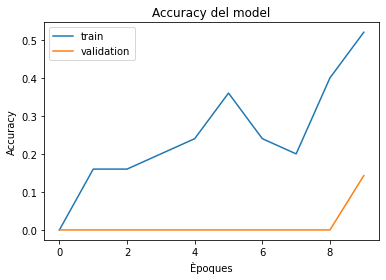

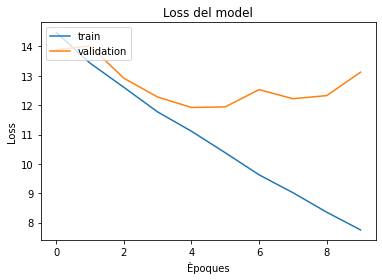

In [224]:

# Visualitzar accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy del model')
plt.ylabel('Accuracy')
plt.xlabel('Èpoques')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Visualitzar loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss del model')
plt.ylabel('Loss')
plt.xlabel('Èpoques')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

model1 Aquest model inclou diverses capes de convolució i pooling per detectar característiques en les imatges, seguit d'una capa totalment connectada per classificar les imatges. A més, també s'ha afegit una capa de dropout per evitar el sobreajustament.

En termes de paràmetres, aquest model té un total de 1,773,711 paràmetres entrenables, que és una quantitat raonable per a un model d'aquesta mida.

No obstant això, és important destacar que la funció d'activació utilitzada en l'última capa és una funció sigmoide, la qual cosa implica que la sortida serà un valor entre 0 i 1 per a cada classe. Això és adequat si cada imatge pot pertànyer a més d'una classe, però si cada imatge només pertany a una classe, seria més adequat utilitzar una funció d'activació softmax.

In [230]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(256, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(23, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_128 (Conv2D)         (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_125 (MaxPooli  (None, 63, 63, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_129 (Conv2D)         (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_126 (MaxPooli  (None, 30, 30, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_130 (Conv2D)         (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_127 (MaxPooli  (None, 14, 14, 128)    

In [227]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)
history = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 0.7063 - accuracy: 0.0400 - val_loss: 0.4041 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: 0.4108 - accuracy: 0.0400 - val_loss: 0.2091 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 1s 935ms/step - loss: 0.2098 - accuracy: 0.0400 - val_loss: 0.3312 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 0.2733 - accuracy: 0.0800 - val_loss: 0.3298 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 1s 1s/step - loss: 0.2560 - accuracy: 0.0800 - val_loss: 0.2768 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 1s 1s/step - loss: 0.2457 - accuracy: 0.0400 - val_loss: 0.2301 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss: 0.1883 - accuracy: 0.1600 - val_loss: 0.2223 - val_accuracy: 0.1429
Epoch 8/20
1/1

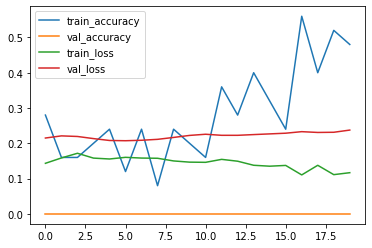

In [231]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

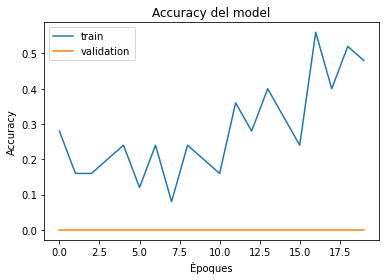

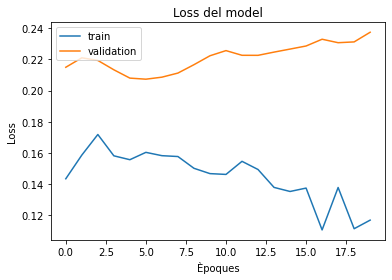

In [232]:
# Visualitzar accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy del model')
plt.ylabel('Accuracy')
plt.xlabel('Èpoques')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Visualitzar loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss del model')
plt.ylabel('Loss')
plt.xlabel('Èpoques')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

el model no funciona molt bé. La precisió de l'entrenament no millora gaire amb el temps i la precisió de la validació es manté a 0 durant tot el procés d'entrenament. A més, la pèrdua no disminueix significativament amb el temps. 

In [ ]:
#Per entrenar el model que hem definit, pots utilitzar el mètode fit_generator de Keras. 
#Aquest mètode permet entrenar el model utilitzant un generador 
#de imatges, que és el que hem creat amb la funció flow_from_directory de ImageDataGenerator.

#Per entrenar el model amb les dades de train i validar-lo amb les dades de validació, podem fer el següent:

In [3]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(23, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [26]:
num_train_samples = train_generator.samples
batch_size = train_generator.batch_size
STEPS_PER_EPOCH = num_train_samples // batch_size
num_val_samples = len(val_generator.filenames)
VALIDATION_STEPS = num_val_samples // batch_size

EPOCHS = 10

history = model.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=VALIDATION_STEPS
)



2023-04-07 18:14:09.233594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/10
2701/2701 [==============================] - ETA: 0s - loss: 2.7508 - accuracy: 0.1462

2023-04-07 18:33:39.512163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2701/2701 [==============================] - 1233s 456ms/step - loss: 2.7508 - accuracy: 0.1462 - val_loss: 2.7349 - val_accuracy: 0.1523
Epoch 2/10
2701/2701 [==============================] - 1234s 457ms/step - loss: 2.6897 - accuracy: 0.1584 - val_loss: 2.6617 - val_accuracy: 0.1619
Epoch 3/10
2701/2701 [==============================] - 1230s 455ms/step - loss: 2.6571 - accuracy: 0.1644 - val_loss: 2.6127 - val_accuracy: 0.1770
Epoch 4/10
2701/2701 [==============================] - 1241s 459ms/step - loss: 2.6404 - accuracy: 0.1694 - val_loss: 2.6376 - val_accuracy: 0.1680
Epoch 5/10
2701/2701 [==============================] - 1253s 464ms/step - loss: 2.6279 - accuracy: 0.1720 - val_loss: 2.6063 - val_accuracy: 0.1762
Epoch 6/10
2701/2701 [==============================] - 1227s 454ms/step - loss: 2.6185 - accuracy: 0.1750 - val_loss: 2.6107 - val_accuracy: 0.1728
Epoch 7/10
2701/2701 [==============================] - 1233s 456ms/step - loss: 2.6100 - accuracy: 0.1761 - val_loss

Els resultats del model indiquen que la pèrdua (loss) disminueix gradualment al llarg de les èpoques i l'exactitud (accuracy) augmenta una mica fins a la cinquena època, però després es manté estacionària. Això indica que el model pot estar arribant a un punt d'estancament (plateau) on no millora més. En general, la gràfica mostra que la exactitud de la validació és més baixa que la exactitud d'entrenament, el que indica que el model pot estar sobreajustant-se als dades d'entrenament. El punt on la exactitud d'entrenament i la exactitud de validació es toquen pot ser un indicador del punt on el model comença a sobreajustar-se

In [27]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

2023-04-07 23:57:51.199264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Test accuracy: 0.187510147690773


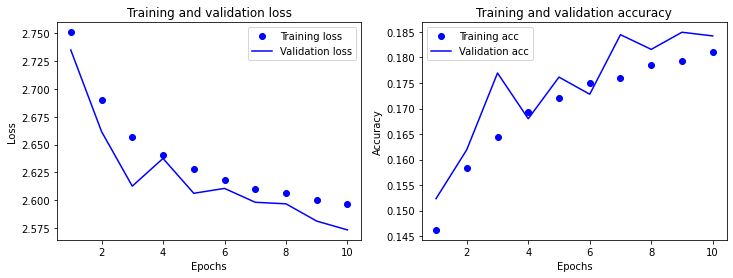

In [28]:
import matplotlib.pyplot as plt

# Visualitzar l'evolució de la pèrdua i l'exactitud
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



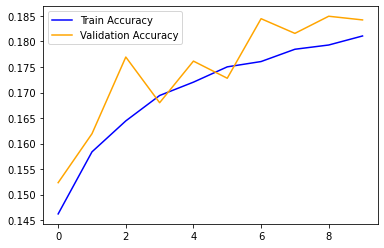

In [29]:
plt.plot(history.history['accuracy'], color='blue', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend()
plt.show()
plt.show()

Hi ha diverses estratègies que podem utilitzar per millorar el model de classificació d'imatges. Algunes de les opcions són:

Augmentar la complexitat del model: pots provar d'augmentar el nombre de capes o el nombre de neurones per a cada capa. Això pot permetre al model capturar millor les característiques de les imatges.
Provar amb altres arquitectures de xarxes neuronals: en lloc d'utilitzar una xarxa convolucional (CNN) pots provar amb altres arquitectures com ara una xarxa residual (ResNet), una xarxa neuronal recurrent (RNN) o una xarxa neuronal convolucional 1D (CNN1D). Diferents arquitectures poden funcionar millor per a diferents problemes.
Ajustar els hiperparàmetres: pots provar diferents combinacions de hiperparàmetres com ara la taxa d'aprenentatge, el nombre d'epochs, la mida del lot, etc. per a veure quina combinació funciona millor per al teu problema.
Preentrenar una xarxa neuronal: pots utilitzar una xarxa preentrenada com a base per al teu model. Això pot ser especialment útil si tens poc volum de dades. Pots utilitzar una xarxa preentrenada com a extractora de característiques i afegir-li algunes capes per a adaptar-la al teu problema.
Fer una millor neteja i preparació de les dades: si les dades no estan ben netejades o preparades, pot ser difícil per al model aprendre'n de forma efectiva. Pots revisar les dades per a detectar i eliminar imatges corruptes o duplicades, i pots normalitzar les dades per a que estiguin en la mateixa escala.
Ajudar el model a generalitzar millor: pots utilitzar tècniques com ara dropout, regularització, data augmentation i early stopping per a ajudar el teu model a evitar overfitting i a generalitzar millor a noves dades.
Incrementar el volum de dades: la millor manera de millorar la precisió d'un model és augmentar el volum de dades. Pots buscar noves fonts de dades, etiquetar manualment més imatges o utilitzar tècniques de data augmentation per a generar més dades a partir de les que ja tens.

2a ARQUITECTURA MODEL4C. En aquesta arquitectura s'han afegit 4 capes convolucionals i 4 capes de max pooling, augmentant la profunditat del model. També s'han afegit 2 capes de dropout per ajudar a reduir l'overfitting.

In [142]:
model4c = Sequential()

model4c.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model4c.add(MaxPooling2D((2, 2)))

model4c.add(Conv2D(64, (3, 3), activation='relu'))
model4c.add(MaxPooling2D((2, 2)))

model4c.add(Conv2D(128, (3, 3), activation='relu'))
model4c.add(MaxPooling2D((2, 2)))

model4c.add(Conv2D(256, (3, 3), activation='relu'))
model4c.add(MaxPooling2D((2, 2)))

model4c.add(Flatten())

model4c.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model4c.add(Dense(128, activation='relu'))
model4c.add(Dropout(0.5))

model4c.add(Dense(23, activation='softmax'))

model4c.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model4c.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 128)    

In [143]:
num_train_samples = train_generator.samples
batch_size = train_generator.batch_size
STEPS_PER_EPOCH = num_train_samples // batch_size
num_val_samples = len(val_generator.filenames)
VALIDATION_STEPS = num_val_samples // batch_size

EPOCHS = 10

history = model4c.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=VALIDATION_STEPS
)




Epoch 1/10


2023-04-05 14:57:15.673495: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2701/2701 [==============================] - ETA: 0s - loss: 2.8316 - accuracy: 0.1273

2023-04-05 15:35:22.616828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2701/2701 [==============================] - 2369s 875ms/step - loss: 2.8316 - accuracy: 0.1273 - val_loss: 2.8170 - val_accuracy: 0.1356
Epoch 2/10
2701/2701 [==============================] - 2299s 851ms/step - loss: 2.8011 - accuracy: 0.1336 - val_loss: 2.7723 - val_accuracy: 0.1380
Epoch 3/10
2701/2701 [==============================] - 2230s 825ms/step - loss: 2.7609 - accuracy: 0.1422 - val_loss: 2.7137 - val_accuracy: 0.1509
Epoch 4/10
2701/2701 [==============================] - 2323s 860ms/step - loss: 2.7302 - accuracy: 0.1479 - val_loss: 2.6903 - val_accuracy: 0.1590
Epoch 5/10
2701/2701 [==============================] - 2336s 865ms/step - loss: 2.7091 - accuracy: 0.1520 - val_loss: 2.6724 - val_accuracy: 0.1557
Epoch 6/10
2701/2701 [==============================] - 2344s 868ms/step - loss: 2.6966 - accuracy: 0.1529 - val_loss: 2.6648 - val_accuracy: 0.1570
Epoch 7/10
2701/2701 [==============================] - 2338s 865ms/step - loss: 2.6856 - accuracy: 0.1573 - val_loss

In [144]:
test_loss, test_acc = model4c.evaluate_generator(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

2023-04-05 21:42:25.580340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Test accuracy: 0.1693718582391739


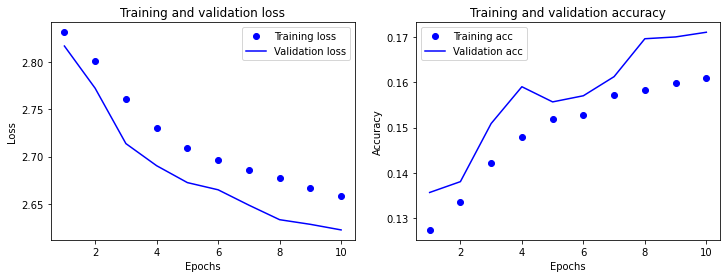

In [145]:
# Visualitzar l'evolució de la pèrdua i l'exactitud
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



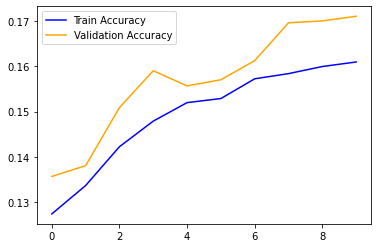

In [146]:
plt.plot(history.history['accuracy'], color='blue', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend()
plt.show()
plt.show()

In [ ]:
ARQUITECTURA model5c

In [192]:
import math

num_val_samples = math.floor(len(val_generator.filenames) / val_generator.batch_size)
num_train_samples=math.floor(len(train_generator.filenames) / train_generator.batch_size)
print(num_val_samples)
print(num_train_samples)

391
2701


In [7]:
model5c = Sequential()

model5c.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model5c.add(BatchNormalization())
model5c.add(MaxPooling2D((2, 2)))

model5c.add(Conv2D(64, (3, 3), activation='relu'))
model5c.add(BatchNormalization())
model5c.add(MaxPooling2D((2, 2)))

model5c.add(Conv2D(128, (3, 3), activation='relu'))
model5c.add(BatchNormalization())
model5c.add(MaxPooling2D((2, 2)))

model5c.add(Conv2D(256, (3, 3), activation='relu'))
model5c.add(BatchNormalization())
model5c.add(MaxPooling2D((2, 2)))

model5c.add(Conv2D(512, (3, 3), activation='relu'))
model5c.add(BatchNormalization())
model5c.add(MaxPooling2D((2, 2)))

model5c.add(Flatten())

model5c.add(Dense(1024, activation='relu'))
model5c.add(Dropout(0.5))

model5c.add(Dense(512, activation='relu'))
model5c.add(Dropout(0.5))

model5c.add(Dense(23, activation='softmax'))

model5c.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model5c.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       256       
 hNormalization)                                                 
                                                      

In [8]:
import tensorflow as tf

# Crea un tensor d'exemple
input_tensor = tf.ones(shape=(32, 64))  # forma (32, 64)

# Defineix una capa densa
dense_layer = tf.keras.layers.Dense(units=128)

# Aplica la capa densa al tensor d'entrada
output_tensor = dense_layer(input_tensor)

# Imprimeix la forma del tensor d'entrada i de sortida
print("Shape del tensor d'entrada:", input_tensor.shape)
print("Shape del tensor de sortida:", output_tensor.shape)

Shape del tensor d'entrada: (32, 64)
Shape del tensor de sortida: (32, 128)


Un tensor conté 32 exemples, cada un amb 64 característiques. Després, defineix una capa densa amb 128 unitats i aplica aquesta capa al tensor d'entrada, obtenint un tensor de sortida amb forma (32, 128), que conté 32 exemples, cada un amb 128 característiques.

In [9]:
# Exemple de dades d'entrada i sortida
inputs = np.random.rand(32, 64)
outputs = np.random.rand(32, 128)

# Comprovar les formes dels tensors
print("Shape del tensor d'entrada:", inputs.shape)
print("Shape del tensor de sortida:", outputs.shape)

Shape del tensor d'entrada: (32, 64)
Shape del tensor de sortida: (32, 128)


In [5]:
from tensorflow.keras.models import load_model

model_entrenat = load_model('/Users/esthersanroma/model-08-2.57.h5')


In [198]:
num_train_samples = train_generator.samples
batch_size = train_generator.batch_size
STEPS_PER_EPOCH = num_train_samples // batch_size
num_val_samples = len(val_generator.filenames)
VALIDATION_STEPS = num_val_samples // batch_size

EPOCHS = 10

# Define el nom del fitxer on es guardarà el model
checkpoint_filepath = 'model-{epoch:02d}-{val_loss:.2f}.h5'

# Defineix el callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

history = model5c.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=VALIDATION_STEPS,
    callbacks=[checkpoint_callback]
)


2023-04-06 10:07:46.874640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/10
2701/2701 [==============================] - ETA: 0s - loss: 2.9065 - accuracy: 0.1230

2023-04-06 11:04:10.414917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2701/2701 [==============================] - 3516s 1s/step - loss: 2.9065 - accuracy: 0.1230 - val_loss: 2.8267 - val_accuracy: 0.1336
Epoch 2/10
2701/2701 [==============================] - 3547s 1s/step - loss: 2.8029 - accuracy: 0.1327 - val_loss: 2.7702 - val_accuracy: 0.1359
Epoch 3/10
2701/2701 [==============================] - 3651s 1s/step - loss: 2.7828 - accuracy: 0.1351 - val_loss: 2.7317 - val_accuracy: 0.1429
Epoch 4/10
2701/2701 [==============================] - 3463s 1s/step - loss: 2.7661 - accuracy: 0.1372 - val_loss: 2.7623 - val_accuracy: 0.1272
Epoch 5/10
2701/2701 [==============================] - 3435s 1s/step - loss: 2.7568 - accuracy: 0.1384 - val_loss: 2.7412 - val_accuracy: 0.1431
Epoch 6/10
2701/2701 [==============================] - 3537s 1s/step - loss: 2.7419 - accuracy: 0.1406 - val_loss: 2.7430 - val_accuracy: 0.1406
Epoch 7/10
2701/2701 [==============================] - 3507s 1s/step - loss: 2.7286 - accuracy: 0.1442 - val_loss: 2.6850 - val_accura

In [30]:
test_loss, test_acc = model5c.evaluate_generator(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

2023-04-08 00:17:14.373110: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Test accuracy: 0.0032462263479828835


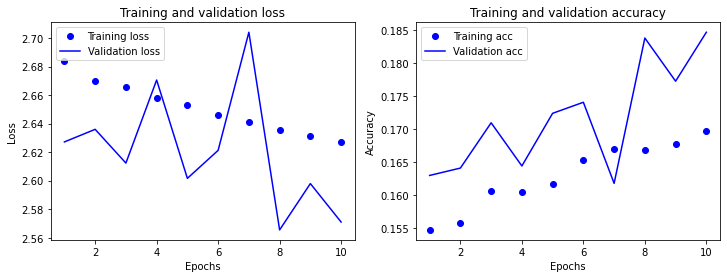

In [203]:
# Visualitzar l'evolució de la pèrdua i l'exactitud
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




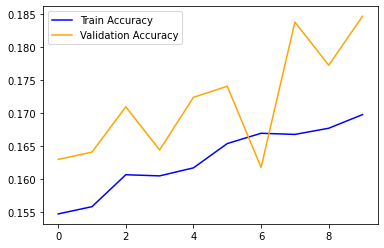

In [204]:
plt.plot(history.history['accuracy'], color='blue', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend()
plt.show()

Aquest model té les mateixes capes que el model anterior, però hi ha afegit més neurones a cada capa. També s'ha afegit una capa addicional amb 256 neurones i una altra capa amb 128 neurones, amb les corresponents capes de Dropout per prevenir overfitting.

Aquesta arquitectura és una xarxa neuronal convolucional (CNN) utilitzada per a la classificació d'imatges. A continuació, es descriuen les funcions i característiques de les diferents capes de la xarxa:

Capa convolucional i normalització: la primera capa convolucional té 32 filtres amb una mida del kernel de 3x3 i una funció d'activació ReLU. La normalització per lot s'utilitza per normalitzar les sortides de la capa anterior.
Capes convolucionals i de pooling: la segona i tercera capes convolucionals tenen 64 filtres amb una mida de kernel de 3x3 i una funció d'activació ReLU. Després d'això, s'aplica una capa de max pooling amb una mida de 2x2 per reduir la mida de la representació.
Regularització: s'aplica una regularització Dropout amb una taxa de 0.25 per reduir el sobreajustament.
Més capes convolucionals i de pooling: la quarta capa convolucional té 128 filtres amb una mida de kernel de 3x3 i una funció d'activació ReLU. A continuació, s'aplica una capa de max pooling amb una mida de 2x2. Les següents capes convolucionals tenen 256 filtres amb una mida de kernel de 2x2 i 3x3, respectivament, amb una funció d'activació ReLU i una capa de max pooling amb una mida de 2x2.
Regularització: s'aplica una regularització Dropout amb una taxa de 0.5 per reduir el sobreajustament.
Capes totalment connectades: es fa un flatten per transformar la sortida de les capes anteriors en un vector i es passa a través de tres capes totalment connectades amb funcions d'activació ReLU i normalització per lot. La sortida de l'última capa totalment connectada té una funció d'activació softmax per a la classificació multiclasse.
Compilació: el model s'entrena amb l'optimitzador Adam amb una funció de pèrdua de "categorical_crossentropy" per classificació multiclasse i s'avalua en precisió.
En resum, aquesta arquitectura consta de diverses capes convolucionals i de max pooling per extreure característiques de les imatges, seguides de capes totalment connectades per a la classificació. Les capes de regularització Dropout i normalització per lot es fan servir per evitar el sobreajustament.

In [52]:
model = Sequential()

# Afegim la primera capa convolucional i normalització
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())

# Afegim capes convolucionals i de pooling
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Afegim regularització
model.add(Dropout(0.25))

# Afegim més capes convolucionals i de pooling
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(2,2), strides=(2,2), activation='relu'))  # Modificació per solucionar l'error
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Afegim regularització
model.add(Dropout(0.5))

# Apliquem flatten per passar a una capa totalment connectada
model.add(Flatten())

# Afegim capes totalment connectades
model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Afegim l'última capa totalment connectada amb activació softmax per la classificació multiclasse
model.add(Dense(units=num_classes, activation='softmax'))

# Compilem el model amb l'optimitzador Adam
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_21 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 124, 124, 64)      18496     
                                                                 
 conv2d_32 (Conv2D)          (None, 122, 122, 64)      36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 61, 61, 64)       

In [53]:
inputs = np.random.rand(32, 64)
outputs = np.random.rand(32, 128)

# Comprovar les formes dels tensors
print("Shape del tensor d'entrada:", inputs.shape)
print("Shape del tensor de sortida:", outputs.shape)

Shape del tensor d'entrada: (32, 64)
Shape del tensor de sortida: (32, 128)


In [58]:
num_train_samples = train_generator.samples
batch_size = train_El resultat obtingutgenerator.batch_size
STEPS_PER_EPOCH = num_train_samples // batch_size
num_val_samples = len(val_generator.filenames)
VALIDATION_STEPS = num_val_samples // batch_size

EPOCHS = 50

# Define el nom del fitxer on es guardarà el model
checkpoint_filepath = 'model-{epoch:02d}-{val_loss:.2f}.h5'
early_stop_callback = EarlyStopping(
    monitor='val_loss',  # monitoritzem la pèrdua en el conjunt de validació
    patience=5,  # aturem l'entrenament si no hi ha millora durant 5 èpoques
    restore_best_weights=True  # restaurem els pesos del millor model entrenat fins al moment
)
# Defineix el callback ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

history = model5c.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=VALIDATION_STEPS,
    callbacks=[checkpoint_callback]
)

Epoch 1/50


2023-04-08 10:14:43.266628: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2701/2701 [==============================] - ETA: 0s - loss: 2.8049 - accuracy: 0.1332

2023-04-08 11:11:44.727543: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2701/2701 [==============================] - 3553s 1s/step - loss: 2.8049 - accuracy: 0.1332 - val_loss: 2.7843 - val_accuracy: 0.1212
Epoch 2/50
2701/2701 [==============================] - 3587s 1s/step - loss: 2.7828 - accuracy: 0.1334 - val_loss: 2.7582 - val_accuracy: 0.1378
Epoch 3/50
2701/2701 [==============================] - 3770s 1s/step - loss: 2.7701 - accuracy: 0.1366 - val_loss: 2.7234 - val_accuracy: 0.1418
Epoch 4/50
2701/2701 [==============================] - 3457s 1s/step - loss: 2.7592 - accuracy: 0.1384 - val_loss: 2.7142 - val_accuracy: 0.1493
Epoch 5/50
2701/2701 [==============================] - 3479s 1s/step - loss: 2.7471 - accuracy: 0.1409 - val_loss: 2.7069 - val_accuracy: 0.1482
Epoch 6/50
2701/2701 [==============================] - 3445s 1s/step - loss: 2.7368 - accuracy: 0.1422 - val_loss: 2.7528 - val_accuracy: 0.1422
Epoch 7/50
2701/2701 [==============================] - 3477s 1s/step - loss: 2.7244 - accuracy: 0.1449 - val_loss: 2.6935 - val_accura

In [59]:
test_loss, test_acc = model5c.evaluate_generator(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

2023-04-10 14:07:39.816921: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Test accuracy: 0.20970621705055237


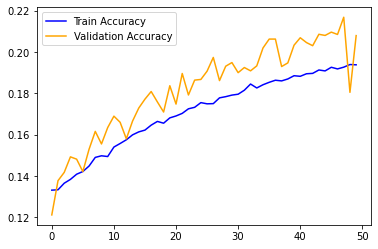

In [60]:
plt.plot(history.history['accuracy'], color='blue', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend()
plt.show()

In [71]:
model_dir = "/Users/esthersanroma/saved_models"
test_dir="/Users/esthersanroma/IT_ACADEMY/directory/test"

model_paths = [os.path.join(model_dir, f) for f in os.listdir(model_dir) if f.endswith(".h5")]
img_height=128 
img_width=128
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

for i in range(len(model_paths)):
    model = keras.models.load_model(model_paths[i])
    loss, accuracy = model.evaluate_generator(test_generator, steps=len(test_generator))
    print(f"Model {i+1} test accuracy: {accuracy}")



Found 24644 images belonging to 23 classes.


2023-04-10 14:55:48.030242: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Model 1 test accuracy: 0.15366823971271515


2023-04-10 15:00:30.959841: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Model 2 test accuracy: 0.20625710487365723


2023-04-10 15:05:03.987573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Model 3 test accuracy: 0.17460639774799347


2023-04-10 15:09:29.099362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Model 4 test accuracy: 0.2094627469778061


2023-04-10 15:13:49.431655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Model 5 test accuracy: 0.18255965411663055


2023-04-10 15:18:11.718178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Model 6 test accuracy: 0.1398717761039734


2023-04-10 15:22:29.548625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Model 7 test accuracy: 0.12510144710540771


2023-04-10 15:26:48.691691: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Model 8 test accuracy: 0.14287453889846802


2023-04-10 15:31:05.914070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Model 9 test accuracy: 0.16612562537193298


2023-04-10 15:35:22.684270: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Model 10 test accuracy: 0.14835253357887268


2023-04-10 15:39:40.003053: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Model 11 test accuracy: 0.1993994414806366


2023-04-10 15:43:57.696809: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Model 12 test accuracy: 0.14445707201957703


2023-04-10 15:48:21.285321: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Model 13 test accuracy: 0.1729832887649536


2023-04-10 15:53:00.431483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Model 14 test accuracy: 0.1593897044658661


1/1 [==============================] - 0s 249ms/step
2


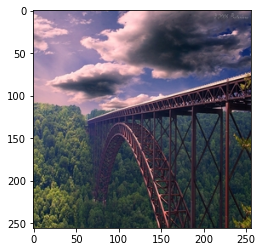

In [98]:
from tensorflow.keras.utils import load_img

from keras.models import load_model
import cv2
import numpy as np

# Carrega el model
model = load_model('/Users/esthersanroma/saved_models/model-04-2.71.h5')

# Carrega la imatge
path = '/Users/esthersanroma/IT_ACADEMY/places/v/viaduct/gsun_0d1e2e693c15c022f5831234a29f01ea.jpg'
img = cv2.imread(path)
img = cv2.resize(img, (128, 128))
img = np.expand_dims(img, axis=0)
img = img / 255.0

# Predicció
pred = model.predict(img)

# Mostra la classe amb la probabilitat més alta
class_idx = np.argmax(pred[0])
print(class_idx)
img = cv2.imread(path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [94]:
class_names = list(train_generator.class_indices.keys())
print(class_names)


['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y']


In [96]:
class_names = list(train_generator.class_indices.keys())
print(class_names[2])

c
